In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 「Parrots.bmp」を読み込み，表示するプログラムを作成せよ．

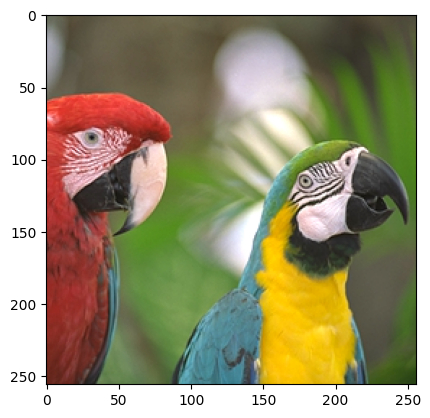

In [3]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.imshow(image_rgb)

# 「Parrots.bmp」を読み込み，RGBチャンネルの値を個別に表示するプログラムを作成せよ．

In [5]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBチャネルの分離
r_channel, g_channel, b_channel = cv2.split(image_rgb)

print(r_channel)
print(g_channel)
print(b_channel)

[[100  98  98 ...  76  76  76]
 [101  98 101 ...  78  78  78]
 [101 101 104 ...  78  79  79]
 ...
 [ 99 101 102 ...  42  41  41]
 [ 99  99 102 ...  41  42  42]
 [102  97 101 ...  42  41  41]]
[[106 104 104 ...  74  74  74]
 [106 104 106 ...  76  75  76]
 [106 106 109 ...  75  77  77]
 ...
 [ 37  38  39 ...  68  67  67]
 [ 37  36  39 ...  67  68  68]
 [ 39  33  38 ...  68  67  67]]
[[86 87 87 ... 57 60 60]
 [89 87 89 ... 59 61 59]
 [89 89 92 ... 61 60 60]
 ...
 [25 26 30 ... 24 23 23]
 [25 27 30 ... 23 24 24]
 [28 25 29 ... 24 23 23]]


# 「Parrots.bmp」を読み込み，青色の要素だけを画像として表示するプログラムを作成せよ．

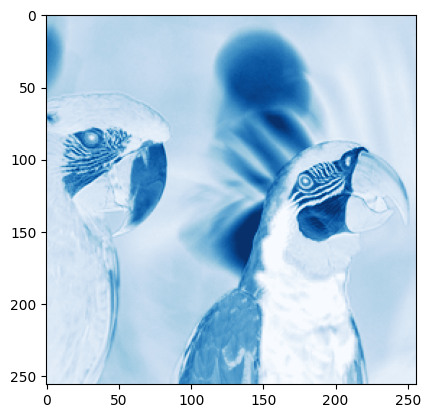

In [7]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBチャネルの分離
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# 青色のチャネルを表示
plt.imshow(b_channel, cmap="Blues")

# 「Parrots.bmp」を読み込み，RGBからCMYK色空間に変換するプログラムを作成せよ．変換された各CMYKチャンネルを画像として表示せよ．

In [8]:
# RGBからCMYKに変換する関数
def rgb_to_cmyk(image_rgb):

    # 各RGBチャネルを0-1に正規化
    image_rgb_normalized = image_rgb / 255.0
    
    # CMYの計算
    c = 1 - image_rgb_normalized[..., 0]
    m = 1 - image_rgb_normalized[..., 1]
    y = 1 - image_rgb_normalized[..., 2]
    
    # Kチャンネルの計算
    k = np.min([c, m, y], axis=0)
    
    # C, M, Yの値をKに基づいて調整
    c = c - k
    m = m - k
    y = y - k
    
		# 0-255の範囲に変換
    cmyk = np.zeros(image_rgb.shape[:2] + (4,), dtype=np.uint8) 
    cmyk[..., 0] = (c * 255).astype(np.uint8)
    cmyk[..., 1] = (m * 255).astype(np.uint8)
    cmyk[..., 2] = (y * 255).astype(np.uint8)
    cmyk[..., 3] = (k * 255).astype(np.uint8)
    
    return cmyk

In [9]:
# 各チャンネルの色を擬似的に再現して表示する
def display_color_channel(channel, color):
    # カラーマップ作成
    blank = np.zeros_like(channel)
    
    if color == 'cyan':
        return np.stack([blank, channel, channel], axis=-1) # シアンはRGB色空間では(0,255,255)
    elif color == 'magenta':
        return np.stack([channel, blank, channel], axis=-1) # マゼンタはRGB色空間では(255,0, 255)
    elif color == 'yellow':
        return np.stack([channel, channel, blank], axis=-1)  # イエローはRGB色空間では(255,255, 0)
    elif color == 'black':
        return np.stack([channel, channel, channel], axis=-1)

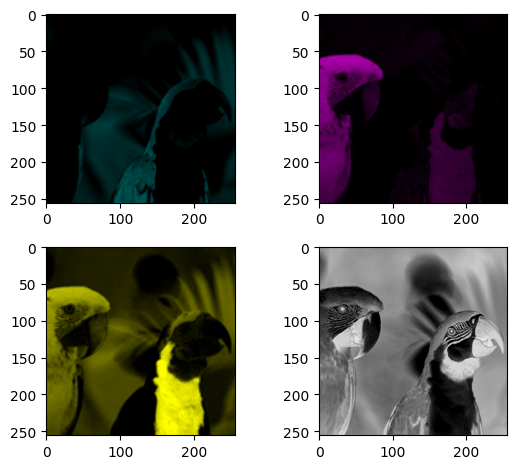

In [10]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# CMYK色空間に変換
image_cmyk = rgb_to_cmyk(image_rgb)

# CMYKチャネルの分離
c_channel, m_channel, y_channel, k_channel = cv2.split(image_cmyk)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(display_color_channel(c_channel, 'cyan'))
axes[0, 1].imshow(display_color_channel(m_channel, 'magenta'))
axes[1, 0].imshow(display_color_channel(y_channel, 'yellow'))
axes[1, 1].imshow(display_color_channel(k_channel, 'black'))

# 「Parrots.bmp」をHSV色空間に変換後，彩度を50%増加させるプログラムを作成し，補正前後の画像を表示せよ

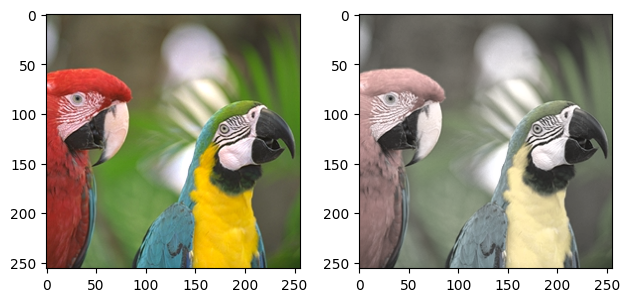

In [49]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

#print(s_channel)
# Sチャンネルの彩度を1.5倍に
s_channel  = (s_channel * 0.3).astype(np.uint8)
s_channel = np.clip(s_channel, 0, 255)  # 値を0-255の範囲に制限
#print(s_channel)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_saturation_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_saturation_rgb)

# 「Parrots.bmp」のコントラストを1.5倍にするプログラムを作成せよ．HSV色空間を使用し，明度チャンネルのみを変更し，補正前後の画像を表示せよ．

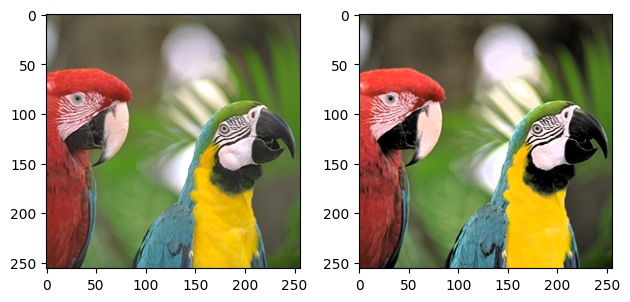

In [15]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Vチャネルのピクセル値の平均を基準に、コントラストを調整
mean_v = np.mean(v_channel)
    
# V値をコントラスト値に基づいて調整する
contrast = 1.5  # 1.5倍のコントラスト
v_channel = np.clip(contrast * (v_channel - mean_v) + mean_v, 0, 255)
v_channel = v_channel.astype(np.uint8)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_contrast_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_contrast_rgb)

# 「Parrots.bmp」を読み込み，ガンマ補正を行うプログラムを作成せよ．ガンマ値を0.5とし，補正前後の画像を表示せよ．

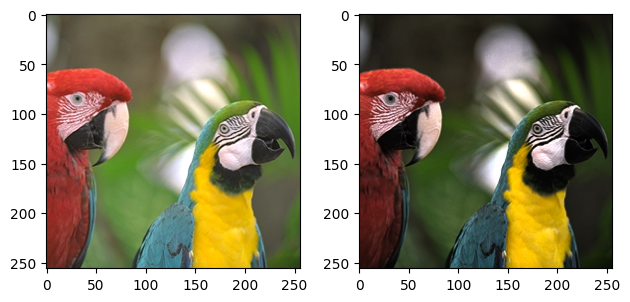

In [17]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# 正規化（0〜1の範囲にスケーリング）
v_channel_normalized = v_channel / 255.0
    
# ガンマ補正を適用
gamma = 0.5  # ガンマ値を0.5に設定（明るい部分を暗く）
v_channel_corrected = v_channel_normalized ** (1 / gamma)

# 0〜255の範囲に再スケーリングし、uint8に変換
v_channel = (v_channel_corrected * 255).astype(np.uint8)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_gamma_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_gamma_rgb)

# 「Parrots.bmp」をYUV色空間に変換し，輝度(Y)チャンネルの値を全体的に50%減少させるプログラムを作成し，補正前後の画像を表示せよ（imshow関数でvmin=0, vmax=255を設定すること）．

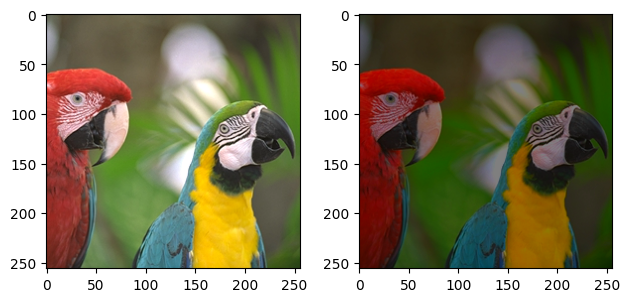

In [20]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Parrots.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBからYUV色空間に変換
image_yuv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YUV)

# YUVチャネルの分離
y_channel, u_channel, v_channel = cv2.split(image_yuv)

# 輝度を0.5倍に
y_channel = (y_channel * 0.5).astype(np.uint8)
y_channel = np.clip(y_channel, 0, 255)

# 再構成したYUV画像の作成
image_yuv_compressed = cv2.merge([y_channel, u_channel, v_channel])

# YUVからRGB色空間に再変換
image_compressed_rgb = cv2.cvtColor(image_yuv_compressed, cv2.COLOR_YUV2RGB)

# 元画像と圧縮画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_compressed_rgb)